# Lineer Regresyon - Proje 1 : TV - Sales

Advertising.csv adlı veri setini kullanarak TV - Sales arasındaki ilişkiye bakacağız.

Amacımız TV bütçesi ile Satış arasındaki ilişkiyi Lineer Regresyon ile modellemek.

Bunun için bir lineer model kuracağız.

* **Adımlar**

    1- Önce datayı ham olarak inceleyelim

    2- Datayı import edelim

    3- Datayı inceleyelim (head, describe, info)

    4- Datayı görselleştir

    5- Modeli oluştur (formuller)

    6- Hazırlık

    7- Train-Test Split

    8- Lineer Regresyon Modelini Çalıştır (Fit - Prediction Hazırlığı)

    9- Katsayıları Hesaplama (intercept_, coef_)

    10- Tahmin Yap (Predict)

    11- Gerçek Data ve Tahmin Datasını Çiz

    12- Hataları Çiz ($y - \hat y$)

    13- Model Doğruluğunu Kontrol Et (RMSE, ve $R^2$)

    14- Yorumlar

### 1- Önce Datanın İşlenmemiş Halini İnceleyelim

* Datanın Analizi
    * Sütunlar neler?
    * Feature (X) ve Label(y) sütunu ne?
    * Toplam kaç kayıt var?
    * Eksik data var mı?
        * NA (Not Available)
        * NaN: Not a Number

***

### 2- Datayı Import Edelim

In [1]:
# Gerekli kütüphaneleri import edelim

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataframe'i oluşturalım

adv_df = pd.read_csv("data/Advertising.csv", index_col=0)

***

### 2- Datayı İnceleyelim [head(), describe(), info()]

In [3]:
# İlk 10 satırı gözlemleyelim

adv_df.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [4]:
# Son 5 satırı gözlemleyelim

adv_df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# Dataframe'in genel bilgilerini görelim

adv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
# Temel istatistiksel bilgilere erişelim

adv_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


***

### 4- Datayı Görselleştirelim

In [7]:
# Input - Output ayrımını yapalım

data = adv_df[["TV", "sales"]]

# X -> Input(Feature)
X = data["TV"]

# y -> Output
y = data["sales"]

In [8]:
# X'in tipi

type(X)

pandas.core.series.Series

In [9]:
# y'nin tipi

type(y)

pandas.core.series.Series

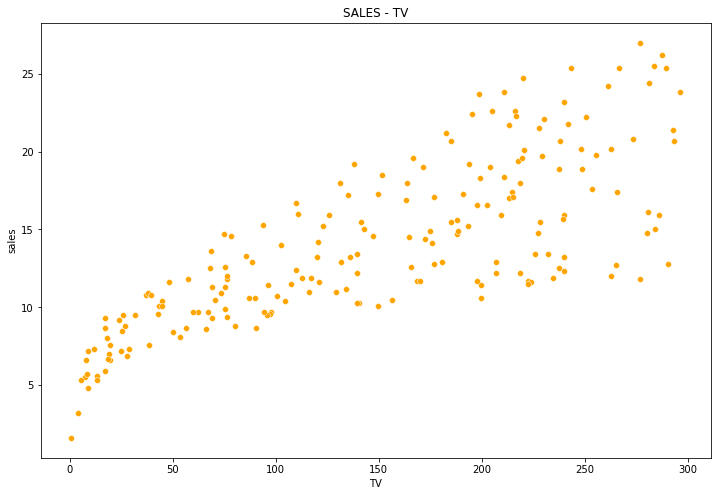

In [10]:
# Grafiği çizmeye başlayalım

plt.figure(figsize=(12, 8))

sns.scatterplot(data=data, x="TV", y="sales", color="orange")

plt.title("SALES - TV")
plt.show()

***

### 5- Modeli Oluştur

Lineer Regresyon Modeli

$$ y = \beta_0 + \beta_1X $$

Machine Learning için dünyada en yaygın kullanılan Python paketi **Scikit-Learn** paketidir ve biz de bu paketi kullanacağız. Bilgi almak için aşağıdaki bağlantıyı kullanabilirsiniz.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [11]:
# sklearn paketinin LinearRegression modülünü import edelim.

from sklearn.linear_model import LinearRegression

In [12]:
# Bir adet lineer regresyon nesnesi yaratalım

linear_reg = LinearRegression()

***

### 6- Data'yı Lineer Regresyon için Hazır Hale Getirelim

* Boyut kontrolü yapmamız lazım.

shape -> `(n_samples, n_features)`

shape -> `(n, p)`

In [13]:
# Önce Input ve Output'un şekline bakalım
# X'in şekli

print(f"X(Input)'in şekli: {X.shape}")

X(Input)'in şekli: (200,)


In [14]:
# y'nin şekli

print(f"y(Output)'nin şekli: {y.shape}")

y(Output)'nin şekli: (200,)


**Yukarıda Input ve Output verilerinin şekil yapısını inceledik. sklearn kütüphanesini kullanarak bu verileri regresyona hazır hale getirebilmemiz için (n_samples, n_features) yapısına getirmemiz gerekiyor.**

In [15]:
# X - Input için (200, 1) şeklinde yeniden şekillendirme yapalım. 
# y - Output için (200, 1) şeklinde yeniden şekillendirme yapalım.

# X : (200, 1) -> 200 adet Örnek Gözlem, 1 adet Sütun/Feature(TV)
# y : (200, 1) -> 200 adet Örnek Gözlem, 1 adet Sütun/Feature(Label)

X = X.values.reshape(-1, 1) # -1 : 200 adet satırı tut(values), 1 : Bir adet boyut ekle
y = y.values.reshape(-1, 1) # -1 : 200 adet satırı tut(values), 1 : Bir adet boyut ekle

In [16]:
print(f"X(Input)'in yeni şekli/boyutu: {X.shape}")

X(Input)'in yeni şekli/boyutu: (200, 1)


In [17]:
print(f"y(Output)'nin yeni şekli/boyutu: {y.shape}")

y(Output)'nin yeni şekli/boyutu: (200, 1)


***

### 7- Train - Test Split

* Toplam 200 adet olan verimizi Train-Test olacak şekilde ikiye ayıracağız.

* Train: %70

* Test: %30

* Train Data: X_train, y_train

* Test Data: X_test, y_test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [18]:
# Scikit-Learn'den Train-Test modülünü import edelim

from sklearn.model_selection import train_test_split

In [19]:
# train_test_split() metodu geriye X_train, X_test, y_train, y_test değerlerini döner
# Train Data -> X_train, y_train
# Test Data -> X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [20]:
# Şekilleri print edelim
# Yukarıda gördüğünüz üzere test için toplam verinin %30'unu train için ise toplam verinin %70'ini ayırdık.
# Toplam 200 verimiz olduğuna göre train için 140 test için 60 veri ayrılır.

print(f"X_train'in şekli/boyutu: {X_train.shape}")
print(f"y_train'in şekli/boyutu: {y_train.shape}")
print(f"X_test'in şekli/boyutu: {X_test.shape}")
print(f"y_test'in şekli/boyutu: {y_test.shape}")

X_train'in şekli/boyutu: (140, 1)
y_train'in şekli/boyutu: (140, 1)
X_test'in şekli/boyutu: (60, 1)
y_test'in şekli/boyutu: (60, 1)


In [21]:
# X_train verisinin tipini yazdıralım
# y_train verisinin tipini yazdıralım
# X_test verisinin tipini yazdıralım
# y_test verisinin tipini yazdıralım

print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


* Gördüğünüz gibi `train_test_split()` metodu geriye Numpy Array döndürür.

***

### 8- Lineer Regresyon Modelini Çalıştıralım (Fit)

In [22]:
# Regresyonu çalıştır -> fit
# fit -> öğrenme, train data üzerinden
# Aslında aşağıdaki işlem katsayıları yani Beta(^)'ları hesaplar, onları öğrenir.

linear_reg.fit(X_train, y_train)

LinearRegression()

***

### 9- Katsayıları Hesaplama (intercept_ -> $\hat \beta_0$, coef_  -> $\hat \beta_1$)

Lineer Regresyonu fit etmenin amacı katsayıları hesaplamaktır.

$\beta_0$ -> intercept

$\beta_1$ -> slope (coefficient)

In [23]:
# intercept -> Beta_0

print(f"Intercept: {linear_reg.intercept_}")

Intercept: [6.98966586]


In [24]:
# slope = coefficent -> Beta_1

print(f"Slope(Coefficent - Eğim): {linear_reg.coef_}")

Slope(Coefficent - Eğim): [[0.04649736]]


$$\hat y = \hat \beta_0 + \hat \beta_1X$$

$$\hat y = 6.989 + 0.0464X$$

* **ARTIK KATSAYILARIMIZI HESAPLADIK YANİ ÖĞRENDİK**

***

### 10- Tahmin Yapma (Predict)

Regresyon katsayılarımızı hesapladığımıza göre test verisi (X_test) üzerinden y'leri tahmin edebiliriz -> `y_pred`

Gerçek y değerleri y_test değişkeni içerisinde mevcut. Onları tahmin doğruluğunu kontrol ederken kullanacağız.

In [25]:
# Tahmin yapalım
# Bunun için X_test kullanacağız çünkü X_train ile öğrenme işlemini gerçekleştirdik.

y_pred = linear_reg.predict(X_test)

In [26]:
# Tahmini yazdıralım
y_pred

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323],
       [12.4391563 ],
       [17.66080969],
       [ 9.60281742],
       [15.72186983],
       [11.04423554],
       [11.36971705],
       [13.95032046],
       [14.90351632],
       [14.59198401],
       [12.23921766],
       [16.97264878],
       [13.00642408],
       [16.07524976],
       [15.21969836],
       [15.58702749],
       [17.23303399],
       [17.20978531],
       [10.49091697],
       [15.58702749],
       [12.71349072],
       [10.1700852 ],
       [10.19798361],
       [12.61584627],
       [15.74976825],
       [ 9.31453379],
       [12.59259759],
       [11.50920913],
       [14.81982107],
       [17.33067844],
       [15.97295557],
       [17.00519693],
       [15.15925179],
       [14.63848137],
       [17.14933874],
       [12.57864838],
       [11

In [27]:
# Tahmin verisinin şeklini yazdıralım

y_pred.shape

(60, 1)

In [28]:
# Test verisinin şeklini yani orijinal output verisinin şeklini yazdıralım

y_test.shape

(60, 1)

***

### 11- Gerçek Data ve Tahmin Datasını Çizmek

Artık test verilerinden yani gerçek dünyadan bahsediyoruz. Train verisi ile işimiz bitti çünkü modeli eğitme işini tamamladık.

* Gerçek Lablel -> y_test
* Tahmini Label -> y_pred
* Input -> X_test

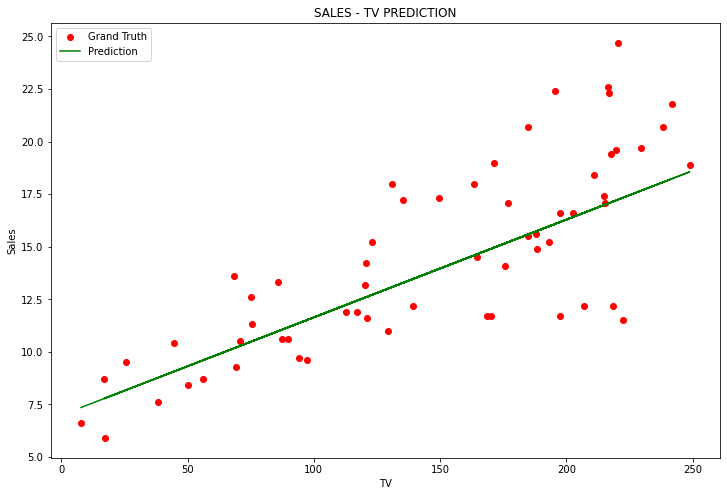

In [29]:
# Gerçek Data -> Grand Truth
# Bir grafik üzerine iki ayrı figür çizeceksek subplot() metodu kullanılır.

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X_test, y_test, label="Grand Truth", color="red")

# Tahmin Datası -> Prediction

ax.plot(X_test, y_pred, label="Prediction", color="green")

# Veriyi görselleştirelim

plt.title("SALES - TV PREDICTION")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

In [30]:
# İlk 10 gerçek y değerini görelim

y_test[0:10]

array([[ 6.6],
       [20.7],
       [17.2],
       [19.4],
       [21.8],
       [12.2],
       [12.2],
       [11.7],
       [22.6],
       [22.3]])

In [31]:
# İlk 10 tahmin edilen y değerini bulalım

y_pred[0:10]

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323]])

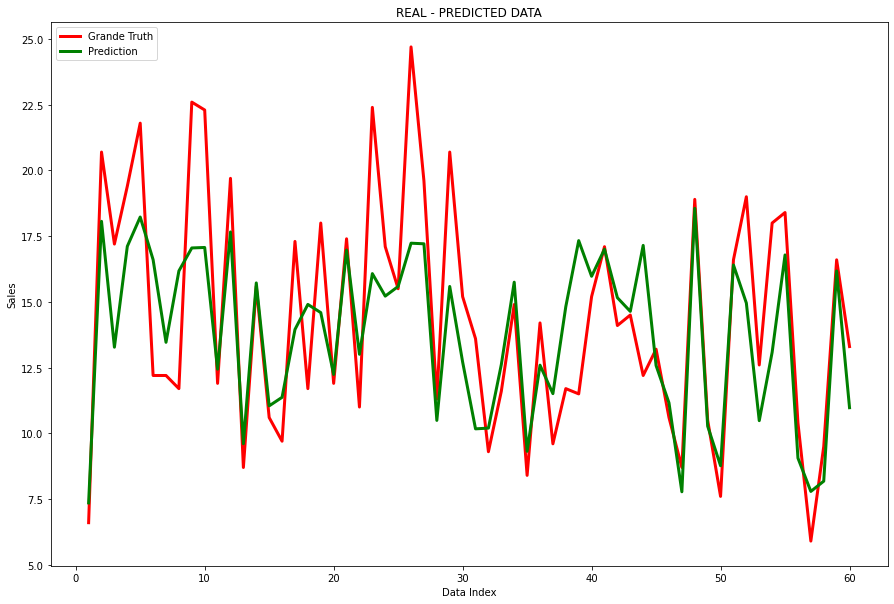

In [32]:
# Her bir tahmin noktasındaki değişimi görelim
indexes = range(1, 61)

# Gerçek Data -> Grand Truth
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(indexes, y_test, label="Grande Truth", color="red", linewidth=3)

# Tahmin -> Prediction
ax.plot(indexes, y_pred, label="Prediction", color="green", linewidth=3)

plt.title("REAL - PREDICTED DATA")
plt.xlabel("Data Index")
plt.ylabel("Sales")
plt.legend(loc="upper left")
plt.show()

***

### 12- Hataları Çiz ($y - \hat y$)

**Hata : Residual -> ($y - \hat y$)**

$y - \hat y$ ---> y_test - y_pred

In [33]:
import numpy as np

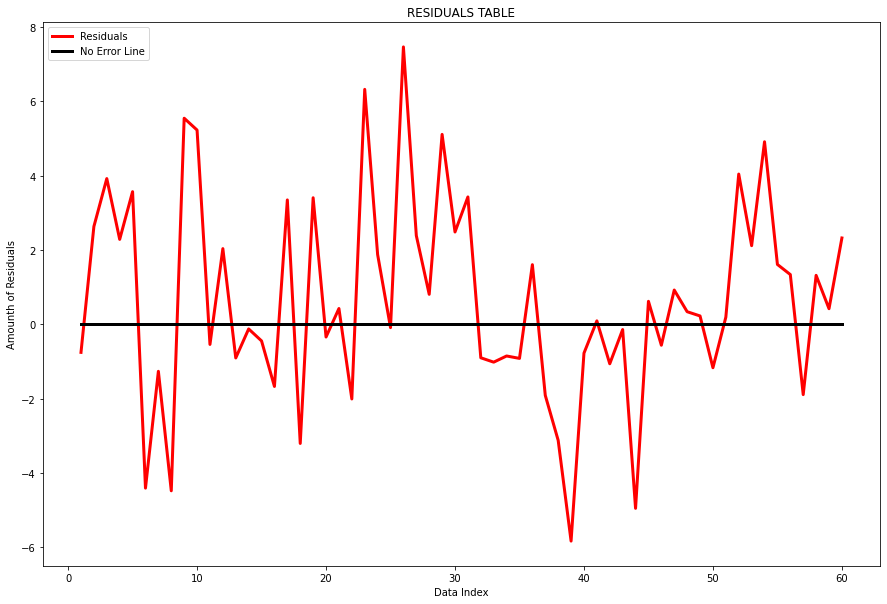

In [34]:
# Her bir tahmin noktasındaki hatayı görelim
indexes = range(1, 61)
residuals = y_test - y_pred

# Residuls Data -> Hatalar
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(indexes, residuals, label="Residuals", color="red", linewidth=3)

# Sıfır doğrusunu çizelim
ax.plot(indexes, np.zeros(60), label="No Error Line", color="black", linewidth=3)

plt.title("RESIDUALS TABLE")
plt.xlabel("Data Index")
plt.ylabel("Amounth of Residuals")
plt.legend(loc="upper left")
plt.show()

***

### 13- Model Doğruluğunu Kontrol Et (RMSE, ve $R^2$)

**RMSE**: Root Mean Squared Error : MSE'nin karekökü.

$R^2$: `Coefficient of Determination`.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [35]:
# sklearn import

from sklearn.metrics import r2_score, mean_squared_error

In [36]:
# R^2 değerini hesaplayalım

r_2 = r2_score(y_test, y_pred)

In [37]:
# R^2'yi yazdır

print(f"R^2 : {r_2}")

R^2 : 0.5942987267783302


In [38]:
# R^2 değerini % olarak yazıralım

print(f"%R^2 : {r_2 * 100}")

%R^2 : 59.42987267783302


In [39]:
# MSE -> RMSE

mse = mean_squared_error(y_test, y_pred)

In [40]:
# MSE'yi yazdır

print('MSE:', mse)

MSE: 7.97579853285485


In [41]:
# RMSE
import math

rmse = math.sqrt(mse)

In [42]:
# RMSE'yi yazdır

print('RMSE:', rmse)

RMSE: 2.8241456288327007


***

### 14- Yorumlar

**$R^2$ = %59.43** sonucunu aldık. Yani neredeyse %60 değerine ulaştık. $R^2$ değeri bize modelimizin iyi olup olmadığını söyler. 

Bu şu demek; bizim modelimiz gerçek datayı %60 oranında temsil ediyor, fena bir oran değil aslında, hatta gerçek için oldukça iyi bir rakam. Tabi bu yorum domain'e yani çalışma alanına göre değişir. Örneğin tıp alanında, kanserli hücrenin tespit edildiği bir çalışmada, %60 değeri oldukça büyük bir rakam, öyle ki %10 bile tıp alanında iyi bir sayı olarak kabul edilir. Ancak WEB ile ilgili bir alanda daha tahmin edilebilir bir çalışmadan bahsediyorsak %60 iyi bir rakam.

***

**RMSE = 2.82** sonucunu aldık.

Bu şu demek; modelimiz tahmin işlemi sırasında ortalama 2.82'lik bir hata yapıyor.

Örneğin, 

Gerçek değer = 22.3 iken tahmin = 17.07 çıkmıştı.